In [296]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
from plotly.graph_objs import *
import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing,cross_validation
from matplotlib import style
import datetime
import math

In [297]:
## Fetching the data
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
params = [{'q':'AAL'}]
period = "5Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)
df.head()

,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
2013-12-09,23.85,25.44,23.4501,24.60,43197268
2013-12-10,24.50,25.17,24.4100,24.88,18660625
2013-12-11,25.48,27.20,25.3700,25.99,38843371
2013-12-12,26.20,26.71,25.4500,25.45,19981824
2013-12-13,25.75,26.30,25.5201,26.23,12192421


In [298]:
df1=df[['AAL_Open','AAL_High','AAL_Low','AAL_Close','AAL_Volume']]
df1.head()

,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
2013-12-09,23.85,25.44,23.4501,24.60,43197268
2013-12-10,24.50,25.17,24.4100,24.88,18660625
2013-12-11,25.48,27.20,25.3700,25.99,38843371
2013-12-12,26.20,26.71,25.4500,25.45,19981824
2013-12-13,25.75,26.30,25.5201,26.23,12192421


In [299]:
daterange = pd.date_range('2018-04-25', '2018-07-30', freq='B')
#newDate = pd.DataFrame(index=['daterange'])
#newDate = newDate.dropna()
#df2=newDate
#df2.head()
df2=pd.DataFrame(data=daterange, columns=['Date'])
df3=df2.set_index('Date')
df3

""
Date
2018-04-25
2018-04-26
2018-04-27
2018-04-30
2018-05-01
2018-05-02
2018-05-03
2018-05-04
2018-05-07


In [300]:
df4=df1.append(df3)
df4.head()

,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume
2013-12-09,24.60,25.44,23.4501,23.85,43197268.0
2013-12-10,24.88,25.17,24.4100,24.50,18660625.0
2013-12-11,25.99,27.20,25.3700,25.48,38843371.0
2013-12-12,25.45,26.71,25.4500,26.20,19981824.0
2013-12-13,26.23,26.30,25.5201,25.75,12192421.0


In [301]:
forecast_col ='AAL_Close'
df4.fillna(-9999,inplace=True)

In [302]:
forecast_out = int(math.ceil(0.11*len(df4)))
forecast_out

129

In [303]:
df4['label']=df4[forecast_col].shift(-forecast_out)

In [304]:
X = np.array(df4.drop(['label'],1))
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df4.dropna(inplace=True)

In [305]:
Y = np.array(df4['label'])
df4.dropna(inplace=True)

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [307]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [308]:
forecast_set = clf.predict(X_lately)

In [309]:
df4['Forecast'] = np.nan

In [310]:
from datetime import date
from datetime import datetime
d = df4.iloc[-1].name
last_date=datetime.combine(d, datetime.min.time())

In [311]:
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [313]:
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df4.loc[next_date] = [np.nan for _ in range(len(df4.columns)-1)]+[i]  

In [314]:
df4.reset_index(level=None,inplace=True)
df4=df4.rename(index=str, columns={"index": "Date"})
df4['Date'] = pd.to_datetime(df4['Date'])
df5 = df4.set_index('Date')

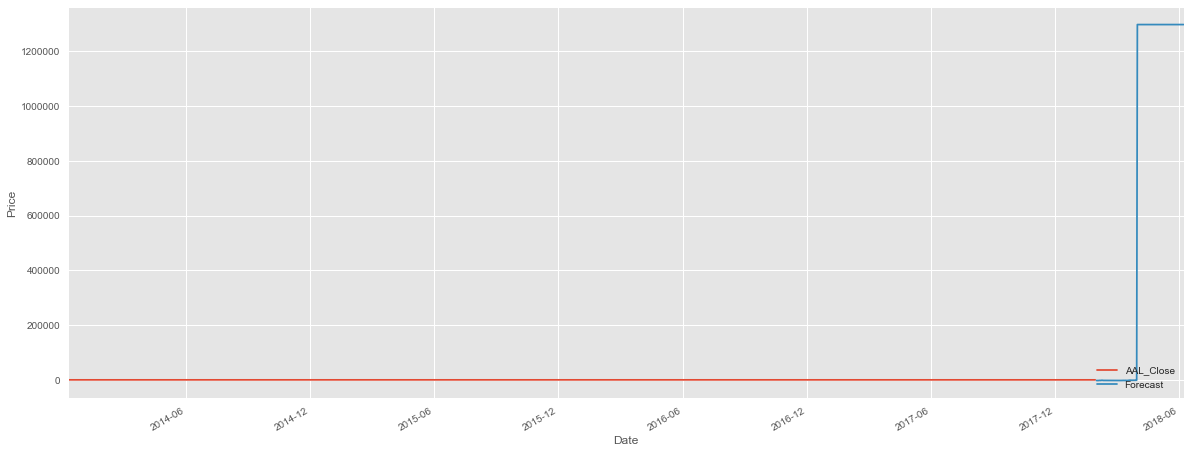

,AAL_Close,AAL_High,AAL_Low,AAL_Open,AAL_Volume,label,Forecast
Date,,,,,,,
2013-12-09 00:00:00,24.600,25.4400,23.4501,23.850,43197268.0,41.0600,NaN
2013-12-10 00:00:00,24.880,25.1700,24.4100,24.500,18660625.0,41.8700,NaN
2013-12-11 00:00:00,25.990,27.2000,25.3700,25.480,38843371.0,42.6600,NaN
2013-12-12 00:00:00,25.450,26.7100,25.4500,26.200,19981824.0,43.0600,NaN
2013-12-13 00:00:00,26.230,26.3000,25.5201,25.750,12192421.0,44.5500,NaN
2013-12-16 00:00:00,26.610,26.7658,26.3500,26.630,13190945.0,44.3600,NaN
2013-12-17 00:00:00,26.100,26.5900,25.9501,26.480,11413199.0,43.1790,NaN
2013-12-18 00:00:00,26.230,26.2300,25.5500,25.990,9994162.0,43.9100,NaN
2013-12-19 00:00:00,26.120,26.4900,25.8210,26.120,6916497.0,44.5500,NaN


In [315]:
plt.figure(figsize=(20,8))
df5['AAL_Close'].plot()
df5['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
df5